# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [357]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Library for calculate skewness coefficient
from scipy.stats import skew

### Understanding the structure of the data

In [358]:
# Read the data
url = 'https://raw.githubusercontent.com/xlisouski/MIT_Projects/refs/heads/main/FoodHub/foodhub_order.csv'
df = pd.read_csv(url)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data? 

In [359]:
# Calculate the number of rows and columns in the dataframe
print('Number of Rows: ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows:  1898
Number of Columns:  9


#### Observations:

The dataset has **1,898 rows**, which means that the same number of orders can be analyzed. As indicated in the data dictionary, there are **9 columns** with order's information.


### What are the datatypes of the different columns in the dataset? (The info() function can be used) 

In [360]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* All columns have 1,898 observations. This means that no column has null values.
* restaurant_name, cuisine_type, day_of_the_week and rating are read as an 'object' data type.
* order_id, customer_id, food_preparation_time and delivery_time are read as an 'int64' data type.
* cost_of_the_order is read as a 'float' data type.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [361]:
# Checking missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [362]:
# Checking missing values with 'Not given' category
(df == 'Not given').sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:

As observed in the previous analysis, none of the columns contain missing values. 

However, the column 'rating' has 736 values with 'Not given' category.


### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [363]:
# Change the scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Statistical summary
description = df.describe().T
# Add the calculation of the coefficient of variation
description['cv'] = description['std'] / description['mean']
# Show results
description

,count,mean,std,min,25%,50%,75%,max,cv
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00,0.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00,0.66
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41,0.45
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00,0.17
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00,0.21


In [364]:
# Description for categorical data
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:

* The food preparation time (food_preparation_time) ranges **from 20 minutes to 35 minutes**. On average, it takes 27.37 minutes to prepare each order. Additionally, the coefficient of variation is 0.17 (or 17%), which indicates that there is not much variability in the preparation time of the order.
* The delivery time (delivery_time) ranges **from 15 minutes to 33 minutes**. On average, it takes 24.16 minutes to delivery each order. Additionally, the coefficient of variation is 0.21 (or 21%), which indicates that there is not much variability in the delivery time of the order.
* There is a discrepancy between the third quartile and the highest value for the cost of the order (cost_of_the_order),  although the difference is not very large, it can be quite significant. Additionally, the coefficient of variation is 0.45 (or 45%), which indicates a considerable amount of variability in the data relative to the mean. This may suggest that the data is dispersed and there could be the presence of some extreme values. This could indicate that there are very cheap and very expensive orders in the dataset.
* The restaurant with more number of orders is **Shake Shack**, with 219 orders.
* The **American** cuisine is the most popular, with 584 orders.
* The **Weekend** is the day of the week with more orders (1,351 orders).
* The rating category with the highest number of orders is **'Not given'**, with 736 orders, which indicates that this column has many missing data.


### How many orders are not rated? 

In [365]:
# Count of categories in rating column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

There are **736 orders** with 'Not given' rating. 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

In [366]:
# Function for graphic histogram and boxplot of numeric variables
def histogram_boxplot(dataset,feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    dataset: data frame
    feature: name of the feature
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=dataset[feature], 
                ax=ax_box, 
                showmeans=True, 
                color='#E7B602')
    
    # Calculating skewness coefficient
    skewness = skew(dataset[feature].dropna())
    
    if ((skewness > 0.1) & (skewness <= 0.5)):
        conclution_sk = 'Weak Positive Skew'
    elif ((skewness > 0.5) & (skewness <= 1)):
        conclution_sk = 'Moderatly Positive Skew'
    elif (skewness > 1):
        conclution_sk = 'High Positive Skew'
    elif ((skewness < -0.1) & (skewness >= -0.5)):
        conclution_sk = 'Weak Negative Skew'
    elif ((skewness < -0.5) & (skewness >= -1)):
        conclution_sk = 'Moderatly Negative Skew'
    elif (skewness < -1):
        conclution_sk = 'High Negativa Skew'
    else: 
        conclution_sk = 'Symmetrical distribution'
    

    # For histogram
    sns.histplot(x=dataset[feature], 
                ax=ax_hist, 
                bins=bins,
                alpha = 0.25,
                kde = True,
                stat='probability',
                color = '#E7B602')
    ax_hist.axvline(np.mean(dataset[feature]), color='g', linestyle='-', 
                    linewidth = 3, label = 'Mean')      # Add mean to the histogram
    ax_hist.axvline(np.median(dataset[feature]), color='red', 
                    linestyle='-', linewidth = 3,
                    label = 'Median') # Add median to the histogram   
    ax_hist.axvline(dataset[feature].quantile(0.25), color='black', 
                    linestyle='--', linewidth = 3,
                    label = 'First Quantile') # Add first quantile to the histogram   
    ax_hist.axvline(dataset[feature].quantile(0.75), color='black', 
                    linestyle='--', linewidth = 3,
                    label = 'Third Quantile') # Add third quantile to the histogram   
    
    ax_hist.legend() # Add legend
    
    plt.title(f'''Sekewness: {str(round(skewness,2))} - {conclution_sk}''') # Add title

    plt.show()

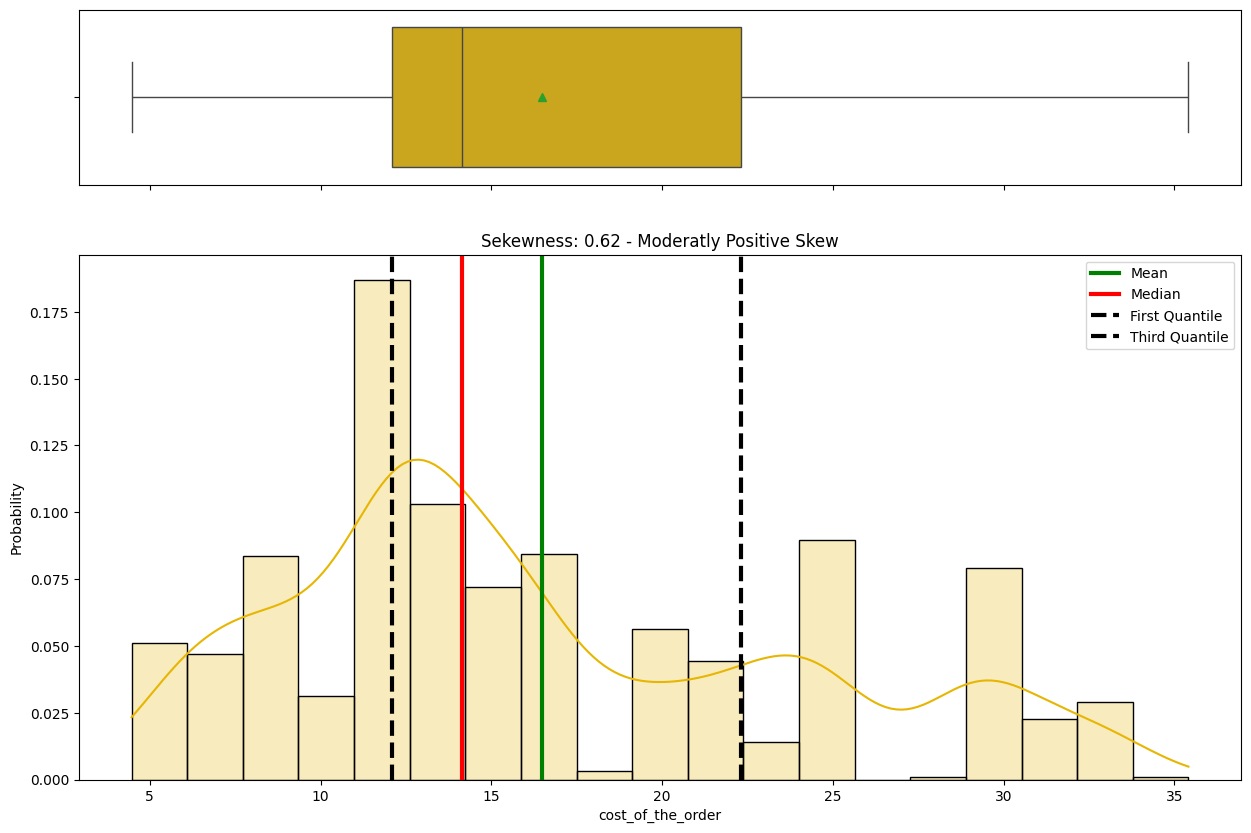

In [367]:
# Cost of the order analysis
histogram_boxplot(dataset = df, feature = 'cost_of_the_order')

**Observations:**
* The distribution of cost ofthe order is moderately right-skewed.
* The majority of the costs are between 10 and 25.
* The median cost is equal to 14, and the mean cost is equal to 16.50.

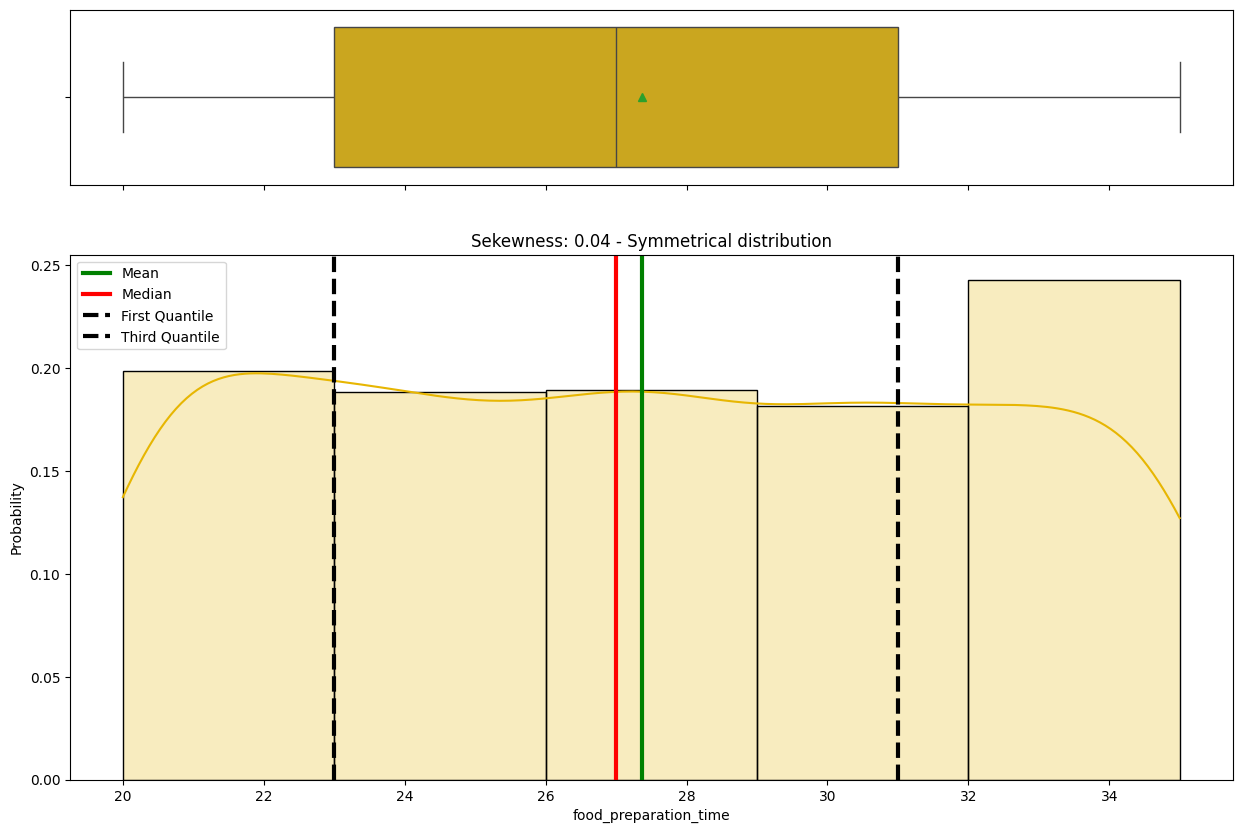

In [368]:
# Food preparation time analysis
histogram_boxplot(dataset = df, feature = 'food_preparation_time', bins=5)

**Observations:**
* The distribution of the food preparation time is quite symmetrical, similar to a uniform distribution.
* The median and the mean are similar and close to 27 minutes.

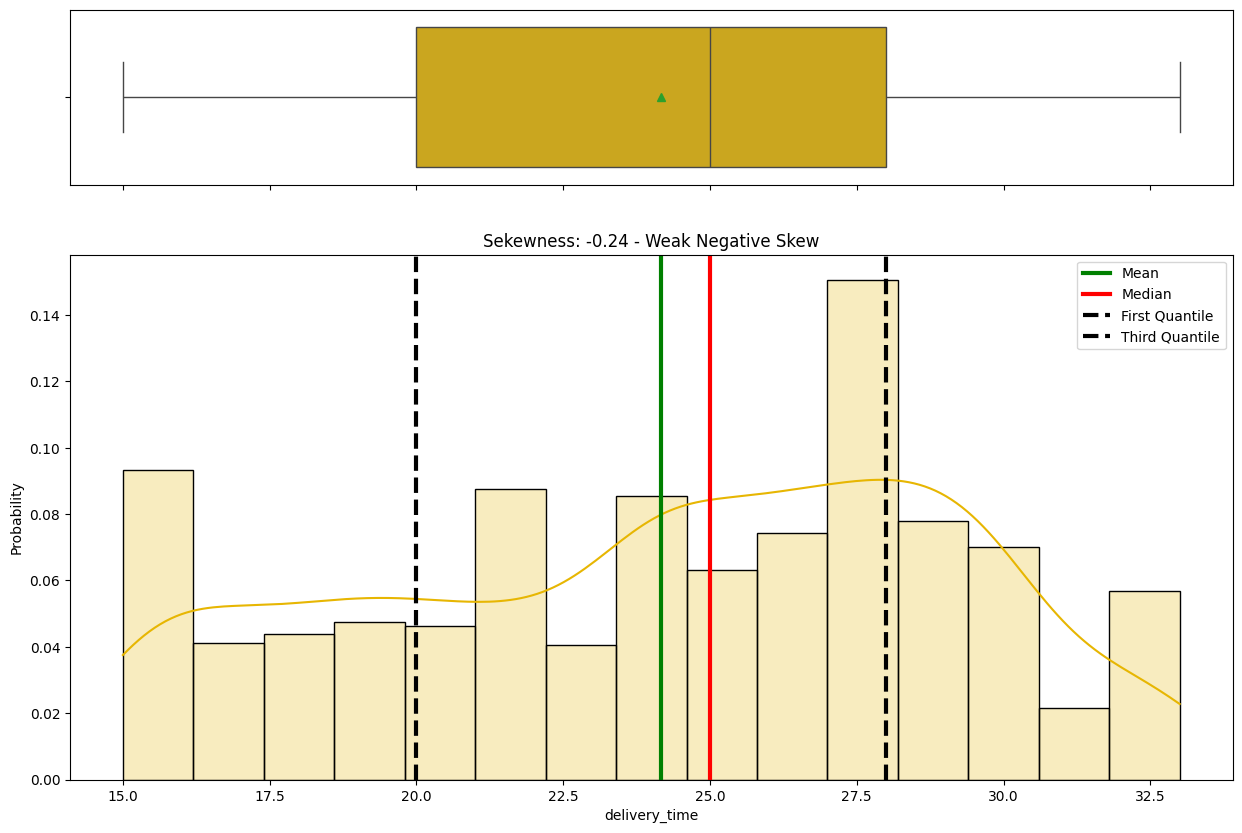

In [369]:
# Delivery time analysis
histogram_boxplot(dataset = df, feature = 'delivery_time', bins=15)

**Observations:**
* The distribution of delivery time is weakly left-skewed.
* The majority of the delivery time are between 20 and 30 minutes.
* The median delivery time is equal to 25, and the mean delivery time is equal to 24, so the distribution shows a very slight skew as the two values are very close to each other.

In [370]:
def bar_perc(data, feature, top, rotate_axis=False, figsize = (15,5), add_others = True):
    
    total = len(data[feature]) # Length of the column
    plt.figure(figsize = figsize)
    
    # Convert the column to a categorical data type
    data[feature] = data[feature].astype('category')
    
    # Get the top n categories, if there are more than the limit
    if (data[feature].value_counts().count() > top):
        top_categories = data[feature].value_counts().nlargest(top).index
    else: 
        top_categories = data[feature].value_counts().index
    
    # Get the variable to graph    
    x_graph = data[feature].apply(lambda x: x if x in top_categories else 'Others')  # Group the rest as 'Others'    
    
    # Convert in category
    x_graph = x_graph.astype('category')
    
    # Ensure 'Others' is always at the end, if it is neccesary
    if (data[feature].value_counts().count() > top):
        category_order = [cat for cat in x_graph.value_counts().index if cat != 'Others']
        if (add_others == True):
            category_order.append('Others')  # Add 'Others' at the end
    else: 
        category_order = x_graph.value_counts().index
    
    # Personalize the rotate axis in function of the number of categories
    if (rotate_axis == True):
        ax = sns.countplot(y=x_graph, palette='Paired', order=category_order)
                
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Percentage of each class
            x = p.get_x() + p.get_width() + 0.05  # Positioning the annotation next to the bar (slightly to the right)
            y = p.get_y() + p.get_height() / 2  # Adjust the vertical placement
            ax.annotate(percentage, (x, y), size=12)  # Annotate the percentage
            
    else: 
        ax = sns.countplot(x=x_graph, palette='Paired', order=category_order)
            
        # Rotate the x-axis labels
        if(x_graph.value_counts().count() > 10): 
            plt.xticks(rotation=90) 
        if(x_graph.value_counts().count() > 6): 
            plt.xticks(rotation=45) 
        
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
            x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
            y = p.get_y() + p.get_height()                              # Height of the plot
            ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
    
    plt.title(f'''Distribution of {feature}''') # Add title
        
    plt.show()                                                      # Display the plot

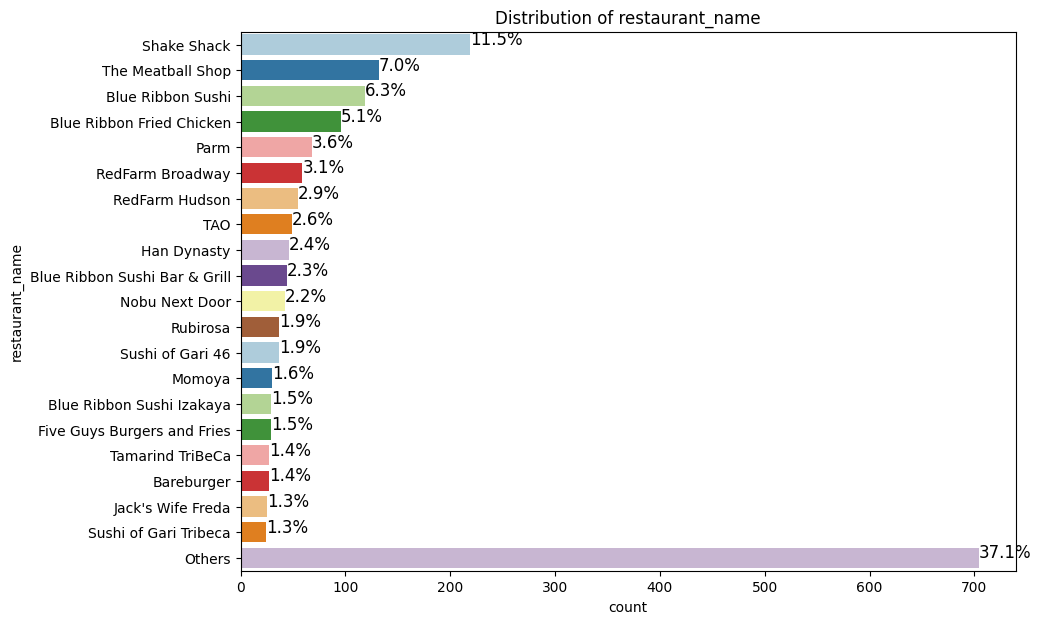

In [371]:
bar_perc(data = df, feature = 'restaurant_name', top = 20, rotate_axis=True, figsize=(10,7))

In [372]:
print('Number of different restaurants: ',df['restaurant_name'].value_counts().count())

Number of different restaurants:  178


**Observations:**
* There are 178 different restaurants in the dataset.
* The restaurant with the most orders is Shake Shack, with 11.5% of the orders.
* The following restaurants are The Meatball Shop with 7% of the orders, and Blue Ribbon Sushi with 6.3% of the orders.

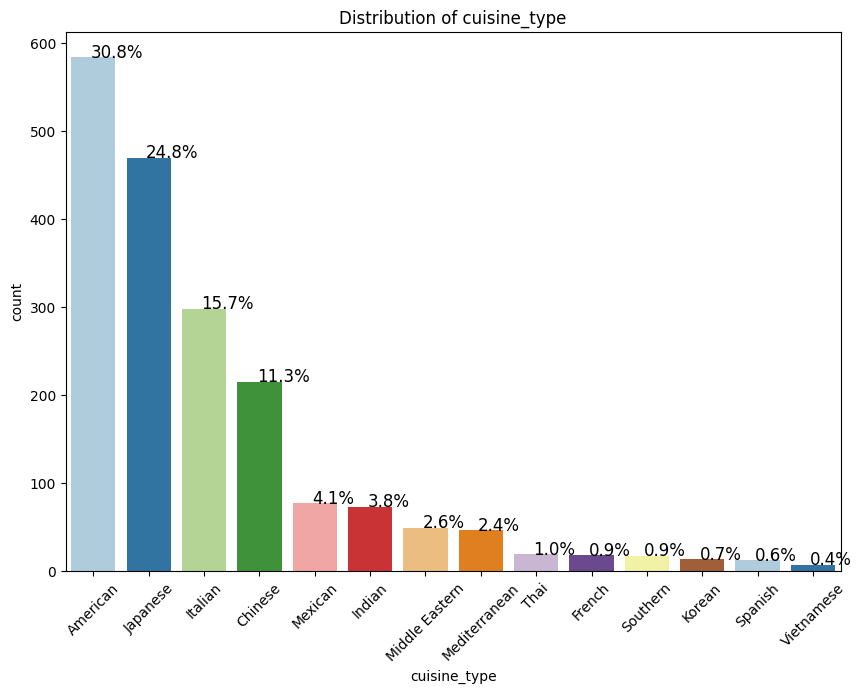

In [373]:
bar_perc(data = df, feature = 'cuisine_type', top = 20, rotate_axis=False, figsize=(10,7))

In [374]:
print('Number of different cusine types: ',df['cuisine_type'].value_counts().count())

Number of different cusine types:  14


**Observations:**
* There are 14 different cusine types in the dataset.
* The food type with the most orders is American food, accounting for 30.8% of the orders, followed by Japanese food with 24.8%.

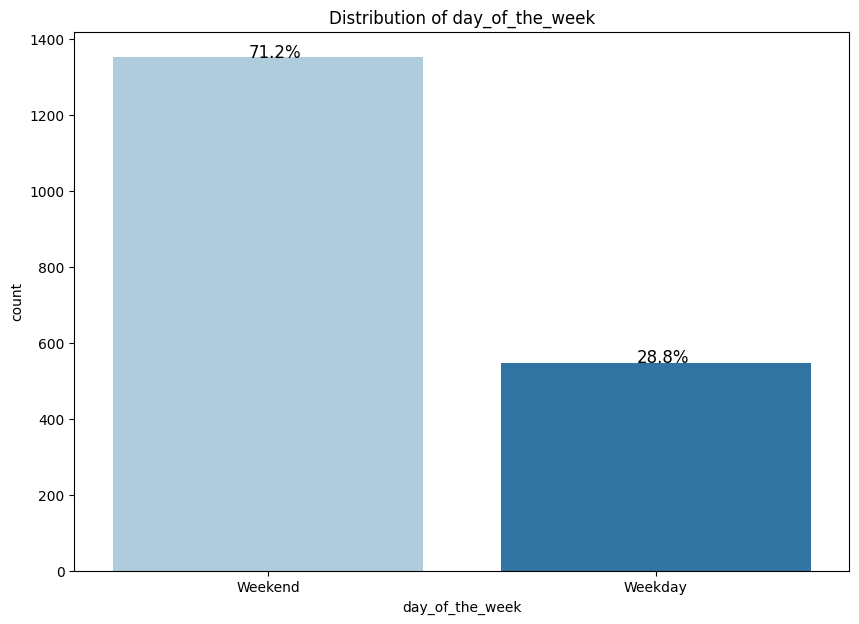

In [375]:
bar_perc(data = df, feature = 'day_of_the_week', top = 20, rotate_axis=False, figsize=(10,7))

**Observations:**
* Only 28,8% of the orders are in Weekday. 

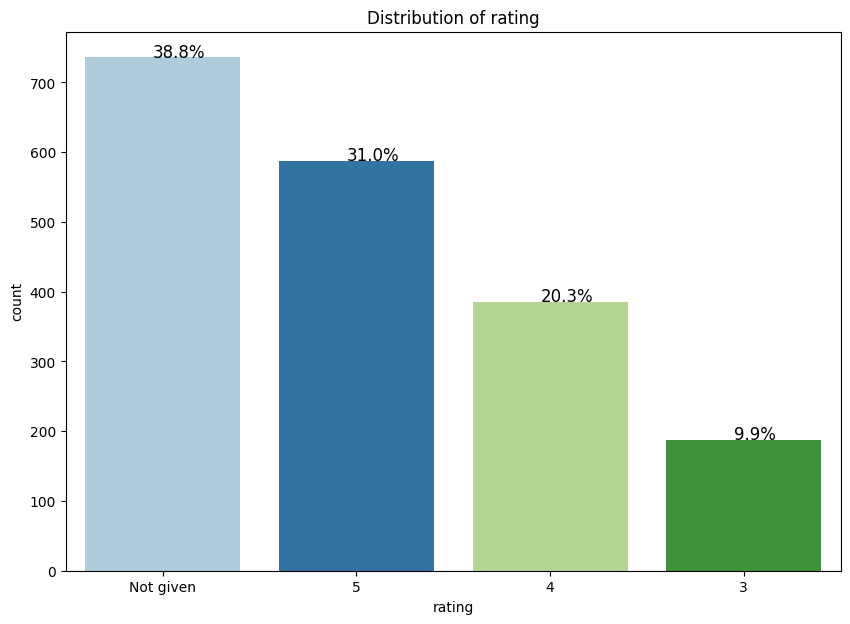

In [376]:
bar_perc(data = df, feature = 'rating', top = 20, rotate_axis=False, figsize=(10,7))

**Observations:**
* The major of the ratings are Not given.
* Only 9,9% of the orders have a rating of 3 points. 

### Which are the top 5 restaurants in terms of the number of orders received?

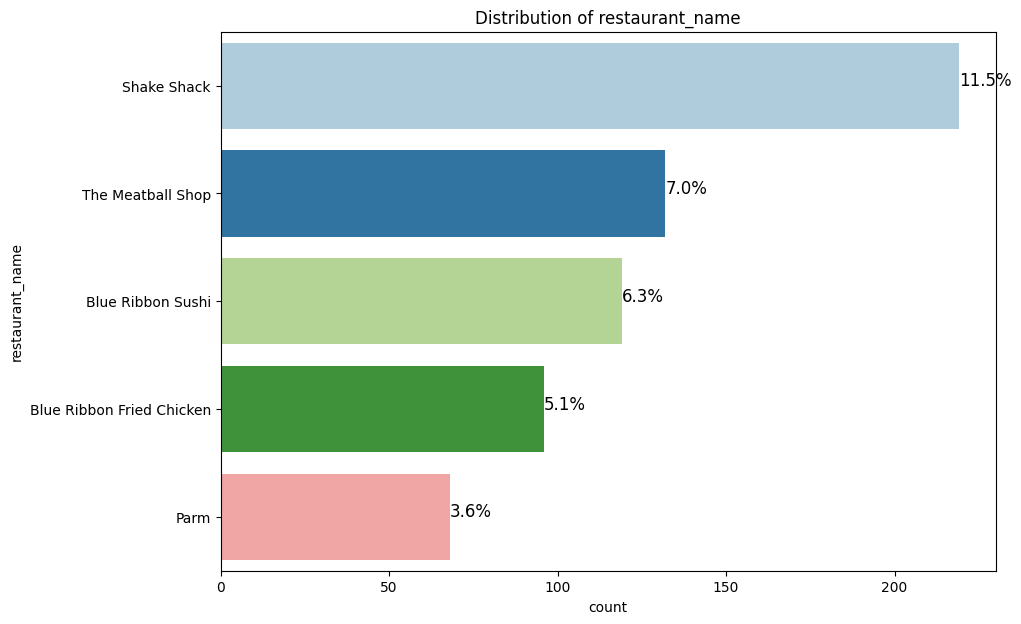

In [377]:
bar_perc(data = df, feature = 'restaurant_name', top = 5, rotate_axis=True, figsize=(10,7), add_others=False)

#### Observations:

The top 5 restaurants with the most orders are as follows:

* Shake Shack with 11.5% of the orders.
* The Meatball Shop with 7% of the orders.
* Blue Ribbon Sushi with 6.3% of the orders.
* Blue Ribbon Fried Chicken with 5.1% of the orders.
* Parm with 3.6% of the orders.


### Which is the most popular cuisine on weekends? 

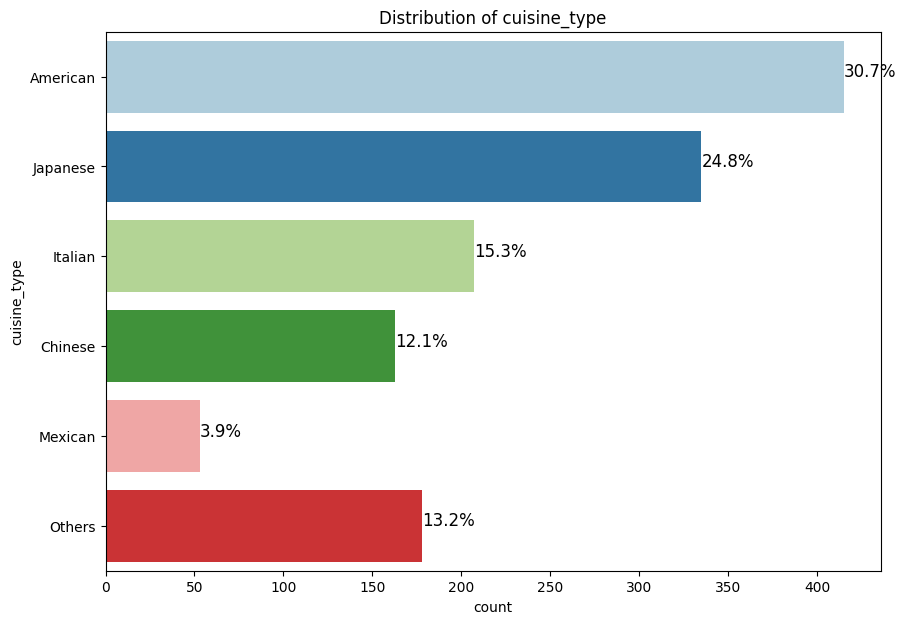

In [378]:
# Analysis of distribution of cuisine_type only in Weekends
bar_perc(data = df.loc[df['day_of_the_week'] == 'Weekend',], 
        feature = 'cuisine_type', top = 5, rotate_axis=True, figsize=(10,7))

#### Observations:

The most popular cuisine type on weekends is American cuisine, with 30.7% of the weekend's orders.


### What percentage of the orders cost more than 20 dollars? 

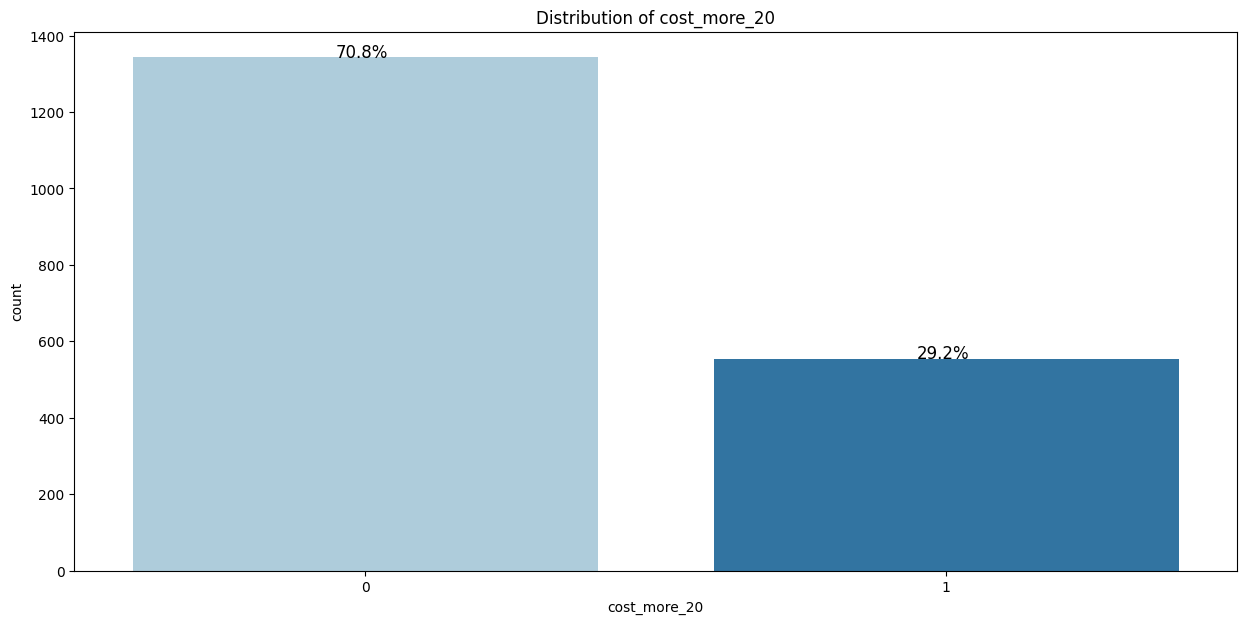

In [379]:
# Calculate a new column
df['cost_more_20'] = np.where(df['cost_of_the_order'] > 20,1,0)
# Graph
bar_perc(data = df, feature = 'cost_more_20', top = 5, rotate_axis=False, figsize=(15,7))

In [380]:
# Calculate the percentage 
pct = round(sum(df['cost_more_20']) / len(df['cost_more_20']) * 100, 1)

# Print result
print('Percentage of orders with cost greater than 20 dollars: ',pct,'%')

Percentage of orders with cost greater than 20 dollars:  29.2 %


#### Observations:
The percentage of orders with a cost greater than 20 dollars is 29.2%.


### What is the mean order delivery time? 

In [381]:
# Calculate
mean_delivery_time = df['delivery_time'].mean()

# Print 
print('Mean order delivery time:', round(mean_delivery_time,1))

Mean order delivery time: 24.2


#### Observations:
The mean order delivery time es 24.2 minutes. 


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [382]:
print('Number of customers: ',df['customer_id'].value_counts().count())

Number of customers:  1200


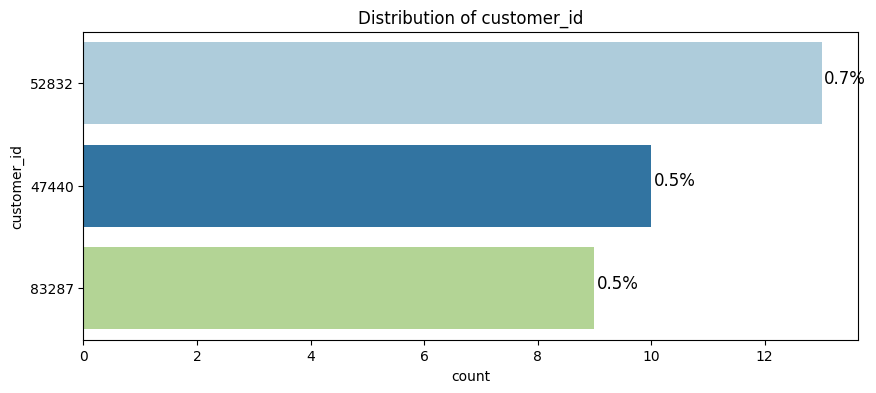

In [383]:
# Analysis of distribution of cuisine_type only in Weekends
bar_perc(data = df, feature = 'customer_id', top = 3, rotate_axis=True, figsize=(10,4), add_others=False)

#### Observations:
* There are 1,200 different customers in the dataset.
* The top 3 customers with the highest number of orders are IDs 52832, 47440, and 83287.


### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


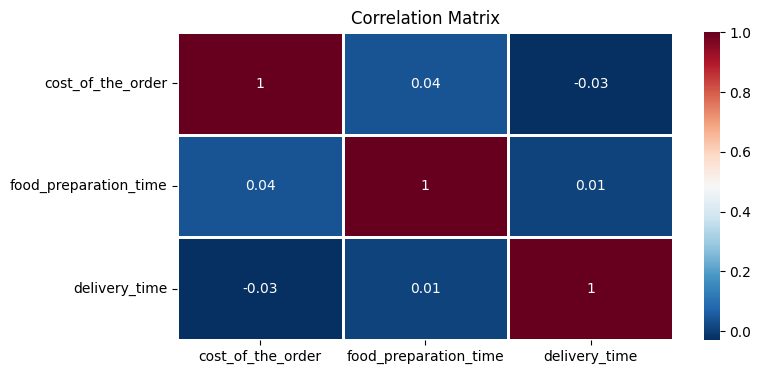

In [384]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']
matriz_corr = df[num_var].corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(round(matriz_corr,2), annot=True,
            cmap = 'RdBu_r',            
            lw = 1)
plt.title('Correlation Matrix')
plt.show()

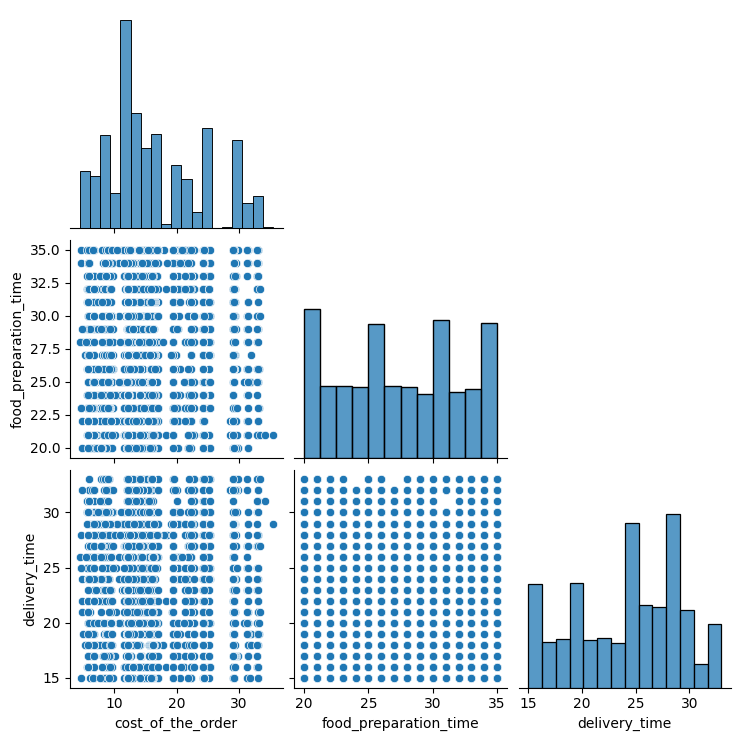

In [385]:
# Pairplot between numerical variables
sns.pairplot(data=df, 
            vars=num_var, 
            corner=True,
            diag_kind = 'hist')

plt.show()

**Observations:**

* Both in the correlation matrix and the pairplot, no strong relationships are observed between the numerical variables.

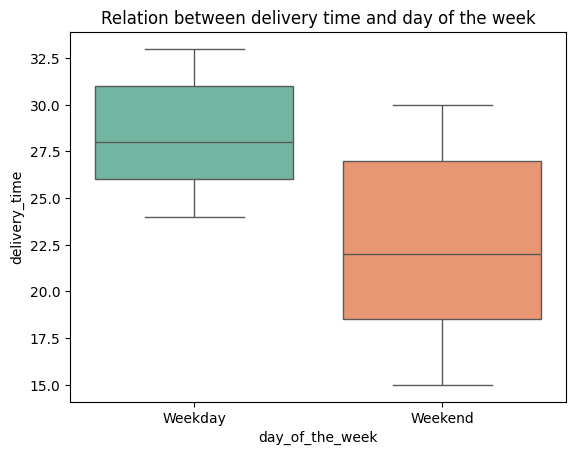

In [386]:
# Relation with rating using boxplots

sns.boxplot(data=df, 
            x='day_of_the_week',
            y='delivery_time',
            palette="Set2")
plt.title('Relation between delivery time and day of the week')
plt.show()

**Observations:**

* The delivery time is significantly shorter on weekends compared to weekdays.

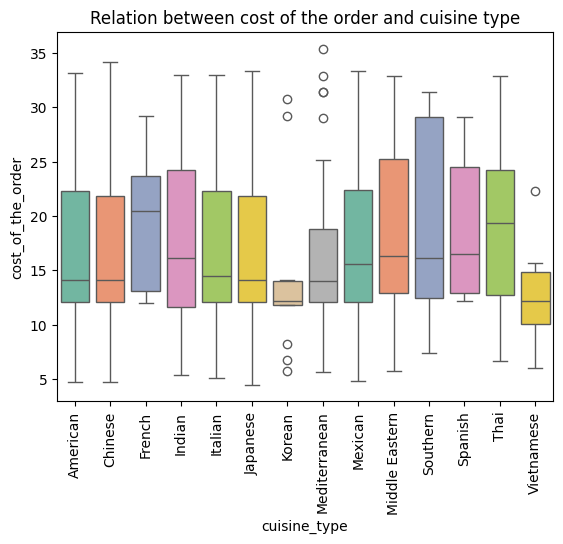

In [387]:
# Boxplot with relation between cost of the order and cuisine type
sns.boxplot(data=df, 
            x='cuisine_type',
            y='cost_of_the_order',
            palette="Set2")
plt.xticks(rotation=90)
plt.title('Relation between cost of the order and cuisine type')
plt.show()

**Observations:**

* Vietnamese and Korean food appear to be significantly cheaper than other types of cuisine.
* French and Thai food seem to be slightly more expensive than the rest.

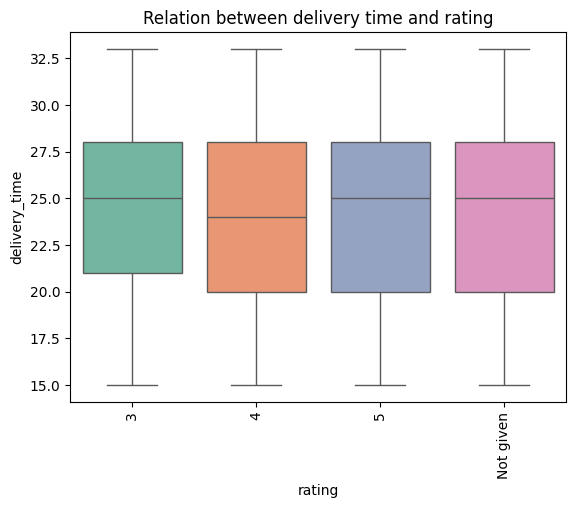

In [388]:
# Boxplot with relation between delivery time and rating
sns.boxplot(data=df, 
            x='rating',
            y='delivery_time',
            palette="Set2")
plt.xticks(rotation=90)
plt.title('Relation between delivery time and rating')
plt.show()

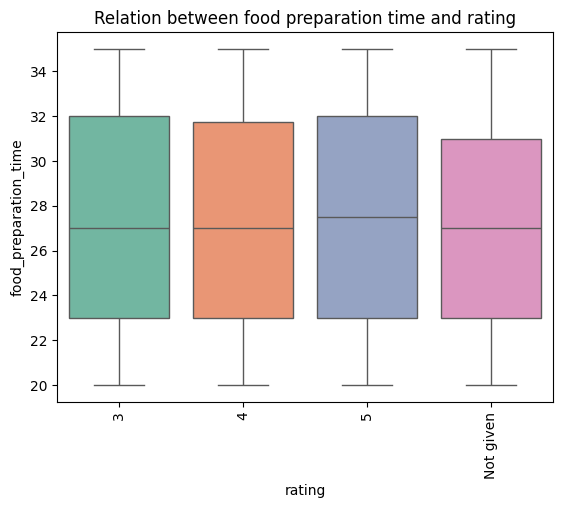

In [389]:
# Boxplot with relation between food preparation time and rating
sns.boxplot(data=df, 
            x='rating',
            y='food_preparation_time',
            palette="Set2")
plt.xticks(rotation=90)
plt.title('Relation between food preparation time and rating')
plt.show()

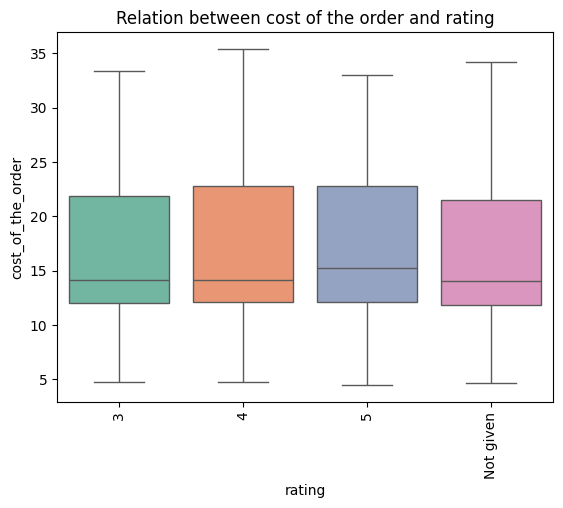

In [390]:
# Boxplot with relation between cost of the order and rating
sns.boxplot(data=df, 
            x='rating',
            y='cost_of_the_order',
            palette="Set2")
plt.xticks(rotation=90)
plt.title('Relation between cost of the order and rating')
plt.show()

**Observations:**

* No significant differences are observed in delivery time, food preparation time, or food cost according to the rating assigned by the customer, so these factors, at first glance, do not seem to influence the rating much.

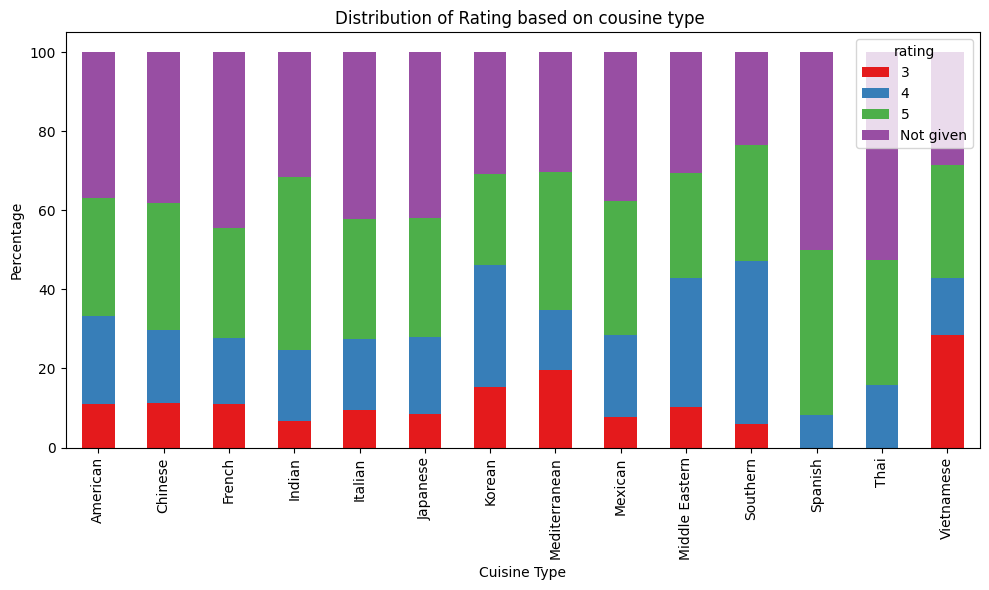

In [391]:
# Create a frequency table
freq_table = df.groupby(['cuisine_type', 'rating']).size().unstack(fill_value=0)

# Calculate the percentages of each value within each bar
freq_table_percentage = freq_table.div(freq_table.sum(axis=1), axis=0) * 100

# Create the stacked bar chart
freq_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set1"))

# Add title and labels
plt.title('Distribution of Rating based on cousine type ')
plt.ylabel('Percentage')
plt.xlabel('Cuisine Type')

plt.tight_layout()
plt.show()

**Observations:**

* Vietnamese restaurants have the highest proportion of rating 3, the lowest score. They are followed by Mediterranean and Korean restaurants.
* Spanish and Thai restaurants have the highest proportion of 'not given' ratings.

In [392]:
# Analysis of orders with associated ratings

# Filter dataset 
df_rating = df.loc[df['rating'] != 'Not given']

# Convert rating in integer
df_rating['rating'] = pd.to_numeric(df_rating['rating'], errors='coerce')

# Calculate boolean with the highest rating
df_rating['best_rating'] = np.where(df_rating['rating'] == 5, 1,0)

# Calculate number of orders with rating
print('Number of orders with rating:',
df_rating['rating'].count())

# Calculate average rating
print('Average rating:',
round(df_rating['rating'].mean(),2))

# Calculate mean of best rating from the orders with rating
print('Average rate of orders with rating = 5:',
round(df_rating['best_rating'].mean()*100,2),'%')

Number of orders with rating: 1162
Average rating: 4.34
Average rate of orders with rating = 5: 50.6 %


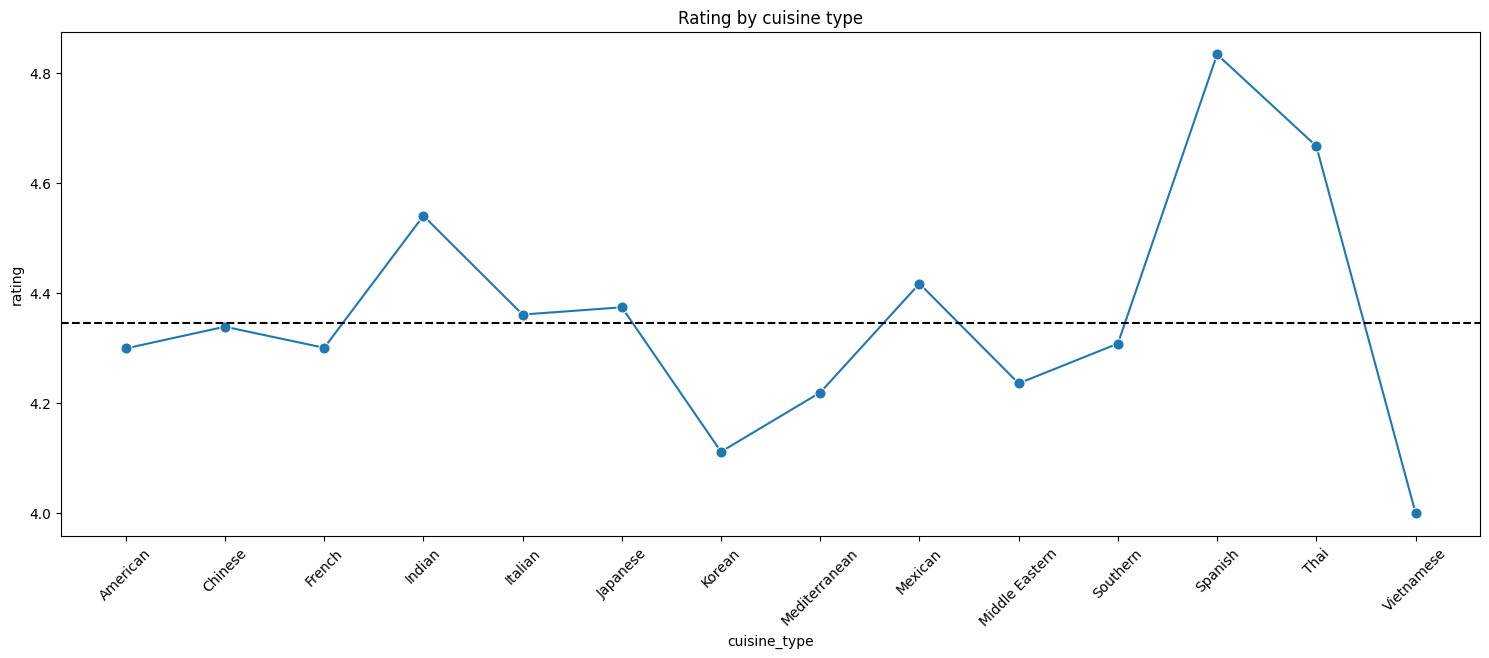

In [393]:
# Creating a lineplot with the average of rating
plt.figure(figsize = (15,6))
# Lineplot
sns.lineplot(data = df_rating , 
            x = 'cuisine_type' , 
            y = 'rating',
            ci=None,
            marker="o", markersize=8)
# Add average rating
plt.axhline(y=df_rating['rating'].mean(), color='black', linestyle='--')
# Add title
plt.title('Rating by cuisine type')
# To remove the text above the plot
plt.tight_layout()
# Rotate the name of x labels
plt.xticks(rotation=45) 
plt.show()

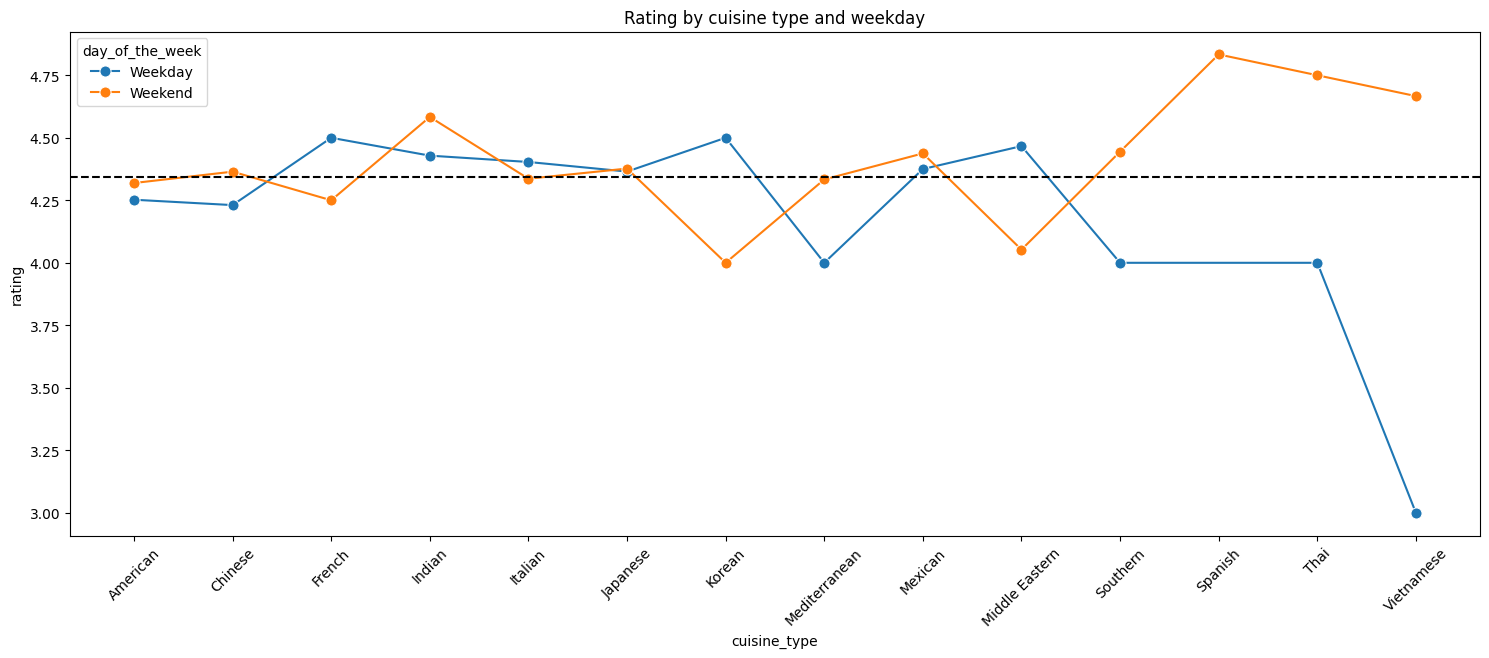

In [394]:
# Creating a lineplot with the average of rating
plt.figure(figsize = (15,6))
# Lineplot
sns.lineplot(data = df_rating , 
            x = 'cuisine_type' , 
            y = 'rating',
            hue='day_of_the_week',
            ci=None,
            marker="o", markersize=8)
# Add average rating
plt.axhline(y=df_rating['rating'].mean(), color='black', linestyle='--')
# Add title
plt.title('Rating by cuisine type and weekday')
# To remove the text above the plot
plt.tight_layout()
# Rotate the name of x labels
plt.xticks(rotation=45) 
plt.show()

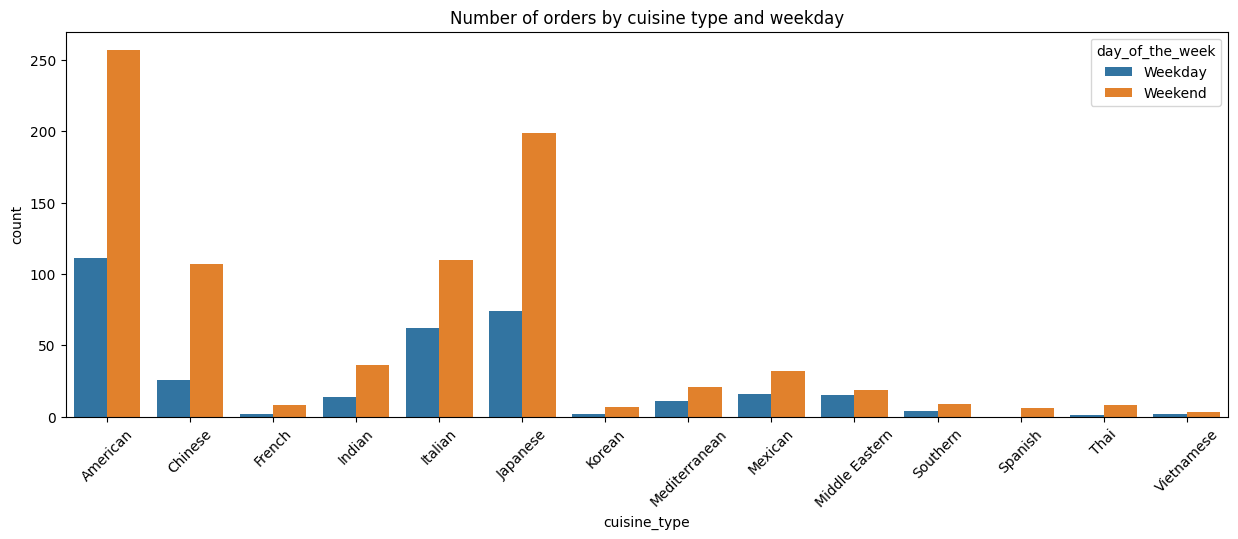

In [395]:
# Validate the number of orders in each combination of categories
plt.figure(figsize = (15,5))
# Countplot
sns.countplot(data=df_rating, x='cuisine_type', hue='day_of_the_week')
# Add title
plt.title('Number of orders by cuisine type and weekday')
# Rotate the name of x labels
plt.xticks(rotation=45) 
plt.show()
plt.show()

**Observations:**

* Of the total orders with rating information (1162), approximately 50% have the highest rating (rating = 5). **The average rating is 4.34**.
* Spanish, Thai, and Vietnamese cuisine have the highest average rating on weekends, but the lowest average rating on weekdays. However, the order volume for calculating these averages is very low, so caution should be taken with these conclusions.
* Indian cuisine has a high average rating on weekends (approx. 4.6) compared to other types of cuisine. This could indicate that Indian restaurants tend to receive better ratings than others.
* Korean and Middle Eastern restaurants have the lowest average ratings on weekends. However, the order volume for calculating this average is very low, so caution should be taken with these conclusions.
* The same pattern occurs with the average rating in Southern, Thai, and Vietnamese cuisine restaurants on weekdays. They seem to have lower average ratings, but the number of orders in these restaurants is also very low, so the rate may be distorted.
* In Mediterranean food restaurants, something notable happens. The average rating on weekdays is lower compared to the weekend average (4 vs 4.30), which could suggest that people tend to rate Mediterranean food better on weekends than on weekdays.
* In French restaurants, the average rating on weekends is lower compared to the average rating on weekdays, which could suggest that people tend to rate this type of food better on weekdays than on weekends.   

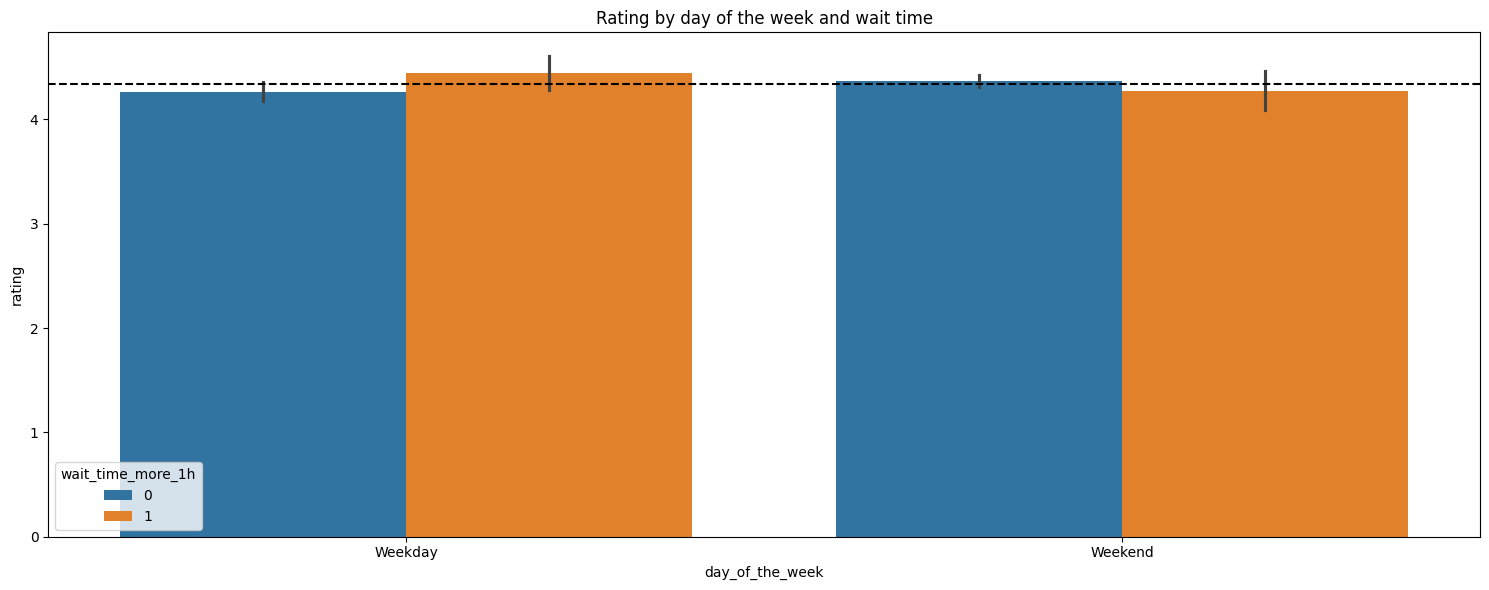

In [396]:
# Calculate wait time
df_rating['wait_time'] = df_rating['food_preparation_time']+df_rating['delivery_time']
# Calculate boolean if customer wait more than 1 hour
df_rating['wait_time_more_1h'] = np.where(df_rating['wait_time']>=60,1,0)
# Creating a lineplot with the average of rating
plt.figure(figsize = (15,6))
# Lineplot
sns.barplot(data = df_rating , 
            x = 'day_of_the_week' , 
            y = 'rating',
            hue='wait_time_more_1h')
# Add average rating
plt.axhline(y=df_rating['rating'].mean(), color='black', linestyle='--')
# Add title
plt.title('Rating by day of the week and wait time')
# To remove the text above the plot
plt.tight_layout()
plt.show()

**Observations:**

* On weekdays, the average rating is slightly higher when the order takes more than one hour, compared to when it takes less than one hour in total (including food preparation and delivery).
* On weekends, the relationship is reversed, as the average rating is slightly lower when the order takes more than one hour.

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [397]:
# Calculate average and count rating of restaurants
average_rating = df_rating.groupby('restaurant_name').agg(     
    Count = ('rating', 'count'),
    Avg = ('rating', 'mean')
).reset_index()

# Filter count > 50
average_rating = average_rating.loc[average_rating['Count']>50]

# Filter rating average > 4
average_rating = average_rating.loc[average_rating['Avg']>4]

# Print
average_rating.sort_values('Avg', ascending=False)

,restaurant_name,Count,Avg
153,The Meatball Shop,84,4.51
20,Blue Ribbon Fried Chicken,64,4.33
136,Shake Shack,133,4.28
21,Blue Ribbon Sushi,73,4.22


**Observations:**

* The restaurants with more than 50 ratings (different from 'Not given'), and with an average rating greater than 4 are:
    * The Meatball Shop
    * Blue Ribbon Fried Chicken	
    * Shake Shack
    * Blue Ribbon Sushi	 

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [398]:
# Calculate revenue column
df['revenue'] = np.where(df['cost_of_the_order'] > 25, df['cost_of_the_order']*0.25,
                        np.where(df['cost_of_the_order'] > 55, df['cost_of_the_order']*0.15,0))

# Print revenue sum 
print('Total Revenue: $', df['revenue'].sum())

Total Revenue: $ 2252.165


#### Observations:
* The company's total revenue is $2,252.165.


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [399]:
# Calculate wait time 
df['wait_time'] = df['food_preparation_time']+df['delivery_time']

# Calculate boolean 
df['wait_time_more_60m'] = np.where(df['wait_time']>60,1,0)

# Calculate and print percentage 
print('Percentage of orders that take more than 60 minutes:',
round(df['wait_time_more_60m'].mean()*100,2),'%')

Percentage of orders that take more than 60 minutes: 10.54 %


#### Observations:
* The percentage of orders that exceed the total time from being placed to being delivered (food preparation time + delivery time) is approximately 10%.


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [400]:
# Calculate average of delivery time betwwen type of days 
average_delivery_time = df.groupby('day_of_the_week').agg(     
    Count = ('delivery_time', 'count'),
    Avg = ('delivery_time', 'mean')
).reset_index()

# Print
average_delivery_time

,day_of_the_week,Count,Avg
0,Weekday,547,28.34
1,Weekend,1351,22.47


#### Observations:
* The delivery time average is significantly shorter on weekends compared to weekdays (22 minutes vs. 28 minutes).


### Conclusion and Recommendations

### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) 

### **Conclusions:**

We analyzed a dataset with information on nearly 2K restaurant orders placed online through the FoodHub app in New York City.
The main feature of interest here is the rating, which measures the customer's level of satisfaction with their order. 

We have been able to conclude that: 

**1.** Most orders do not have an associated rating (39%). However, the rated orders have an average rating of **4.34** points, which indicates a generally high level of satisfaction among customers.

**2.** The most popular restaurant with online orders through FoodHub in New York is **Shake Shack**.

**3.** The most popular cuisine types are **American** and **Japanese**.

**4.** There are more orders on weekends than on weekdays. Delivery time is significantly shorter on weekends compared to weekdays.

**5.** Contrary to expectations, delivery time, food preparation time, and food cost do not seem to have much influence on the rating that the customer assigns to the order.

**6.** The most relevant factor that impacts the rating of orders appears to be the **type of cuisine**.


### **Recommendations:**

Based on the conclusions, we propose the following recommendations to help improve business performance:

**1) Increase weekday orders:**

Develop strategies to encourage more orders during weekdays, such as offering discount coupons or exclusive promotions valid only on weekdays.

**2) Enhance rating participation:**

Implement measures to encourage customers to complete ratings more effectively. For instance, redesign the way the app requests ratings or offer small incentives for completing a review. This would provide more comprehensive feedback on customer preferences.

**3) Address lower-rated cuisines:**

Investigate why Vietnamese, Korean, and Middle Eastern cuisine restaurants receive lower ratings. Identify common issues and work with restaurants to address them.

**4) Analyze rating patterns by day:**

Conduct deeper analysis of cuisines where average ratings vary between weekdays and weekends, such as Mediterranean, Korean, and French restaurants.

**5) Introduce rating-based fee structures:**

Consider implementing a fee structure where the app's charges depend not only on the cost of the food but also on the restaurant's average rating. A lower fee for higher-rated restaurants could incentivize maintaining high-quality standards.

**6) Leverage geographic insights:**

Collect and analyze precise geographic data on orders to identify preferences for specific cuisines in different areas. This information could help tailor marketing strategies to local tastes.

**7) Analyze supply vs. demand:**

Obtain data on the availability of restaurants by cuisine type and compare it with actual sales. Conduct a success rate analysis to determine the gap between supply and demand. This will provide insights into customer preferences and help optimize offerings on the platform.


---